<a href="https://colab.research.google.com/github/sjhd1109/project/blob/main/xai%20credig%20modeling_data%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# 데이터 값 실수. 소수점 f째자리까지 표시
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
data =pd.read_table('/content/drive/MyDrive/data_original.csv',sep=',', encoding='euc-kr')
data = data[data.budo !=99]

In [ ]:
data.head()

,upjong,date,cc,seg,KK001,KK002,KK003,KK004,KK005,KK006,KK007,KK008,KK009,KK010,KK011,KK012,KK013,KK014,KK015,KK016,KK017,KK018,KK019,KK020,KK021,KK022,KK023,KK024,KK025,KK026,KK027,KK028,KK029,KK030,KK031,KK032,KK033,KK034,KK035,KK036,...,KK102,KK103,KK104,KK105,KK106,KK107,KK108,KK109,KK110,KK111,KK112,KK113,KK114,KK115,KK116,KK117,KK118,KK119,KK120,KK121,KK122,KK123,KK124,KK125,KK126,KK127,KK128,KK129,KK130,KK131,KK132,KK133,KK134,KK135,KK136,KK137,KK138,KK139,KK140,budo
0,2,20081231,0,1,3.3115,18.3130,79.6585,-6.1825,59.3279,-4.6046,52.2627,-4.0562,67.2747,-5.2214,52.1097,-4.0444,44.1316,-3.4252,653.4647,-50.7170,79.3569,-6.1591,1.4864,99999999999.0000,12.1440,-151.6643,148.9008,87.5737,-26.9267,30.4259,-23.4480,-4.5531,-51.0994,14.4755,958.3234,94.6089,439.1131,-33.0453,-39.7988,-33.0453,...,-0.9120,-1.0731,1.4890,6.7535,-128.7970,-71.5656,-39.7988,-108.7587,-7.9908,165.4374,65.6084,170.1268,88.0912,71.1406,-34.1547,73.8122,48.9389,58.7797,-167.1308,-311.0709,-140.0400,-123.3630,42.2507,-41.7729,1.2144,3.0622,43.3994,23.3174,18.8615,20.8447,27.0936,10.1570,-51.8614,112.0783,11.3708,0.5561,-0.5111,21.5806,9.4165,0
1,2,20091231,1,1,19.0433,7.8929,-38.2479,-57.7703,-27.5265,-41.5765,-11.0160,-16.6388,-33.0191,-49.8727,-18.8030,-28.4004,-11.7452,-17.7402,-208.4375,-314.8280,-44.3121,-66.9298,99999999999.0000,99999999999.0000,21.2592,-49.0221,1134.9100,-98.8789,14.1774,-11.8093,40.6802,-36.8438,475.0727,-56.9002,103.0291,-30.9021,-74.7146,-24.7763,-30.4111,-24.7763,...,-16.9556,-2.8417,11.3491,5.6349,-28.5231,-114.7346,-30.4111,-30.4111,-17.9409,58.9437,28.8016,100.0623,40.0196,10.0972,14.8501,34.0128,46.3669,99.9378,-80.3295,-55.9163,-68.2722,-27.3223,28.9813,3.6375,17.0720,34.9386,62.4110,89.6598,17.0765,37.6468,49.5663,21.6971,59.7347,136.8170,16.6622,0.2651,11111111111.0000,16.2838,218.9803,0
2,1,20081231,0,1,17.6019,44.7457,8.8659,4.3218,5.0794,2.4760,3.0078,1.4662,7.9087,3.8552,5.7195,2.7880,3.7374,1.8218,112.0677,54.6290,2.9010,1.4141,12.6444,25.9391,2.5886,7.3348,1519.6342,459.4763,64.0518,132.9534,21.6563,36.6762,171.9987,23.8730,-62.7468,-562.2652,-562.2652,0.6129,-2.7221,0.6129,...,-2.9097,0.3454,15.1963,3.3349,-2.1907,-2.1129,-2.7221,-2.7221,1.1300,77.9154,33.9250,109.4868,59.2148,57.1752,-8.7037,52.2444,36.6376,91.3352,-0.8976,-1.0770,-0.7919,-0.4689,8.6564,-2.1550,1.0527,2.4178,2.4827,2.0691,-7.8087,-3.5313,34.5050,1.1548,-8.3947,50.3900,25.0106,1.2883,0.2096,40.7791,38.5533,0
3,1,20091231,0,1,11.5933,45.7986,0.6153,-3.7134,0.4023,-2.4281,0.2782,-1.6791,0.5674,-3.4245,0.4057,-2.4486,0.2590,-1.5632,8.0457,-48.5552,0.2283,-1.3779,176.2270,99999999999.0000,2.8379,-3.6198,891.9933,422.7261,-12.9141,-0.8409,-27.1692,-25.6843,-34.1360,2.3530,-307.8767,191.8157,204.8734,-3.6145,-6.8340,-3.6145,...,8.3581,-0.6148,8.9199,3.2194,-7.6692,-6.0240,-6.8340,-7.1398,-2.0210,124.1781,45.2177,112.2955,69.1537,65.0415,-25.7249,62.1385,26.0836,89.0508,-25.7281,-43.9040,-23.1181,-15.9870,-6.0470,-7.1847,2.8533,7.8359,7.9541,4.6612,1.6829,18.0795,32.1683,7.9451,-21.1108,50.9932,18.1595,1.1344,-3.1981,32.8655,25.0182,0
4,1,20101231,0,1,6.9266,47.9561,-13.4175,-17.6719,-9.7188,-12.8004,-7.7728,-10.2374,-12.5890,-16.5807,-10.0223,-13.2002,-7.4507,-9.8132,-231.8118,-305.3140,-5.6069,-7.3848,99999999999.0000,99999999999.0000,2.4187,-12.3518,597.1536,198.0478,-7.9574,16.3036,-46.5129,-67.0361,-40.2534,4.7110,335.9219,69.1489,61.9042,-9.7170,-12.9312,-9.7170,...,1.2916,-3.0527,5.9715,3.2141,-13.4901,-9.7312,-12.9312,-12.9312,-9.8553,273.7676,57.9303,102.7798,79.9771,78.3317,-52.6978,73.8582,14.8485,97.2954,-41.7818,-145.8353,-38.5852,-30.8593,-20.0599,-17.0647,0.8865,4.1892,4.2322,1.2125,3.7328,2.9490,19.5299,10.5454,-38.0137,53.2779,5.7168,1.3288,-2.1655,18.8322,14.4436,0


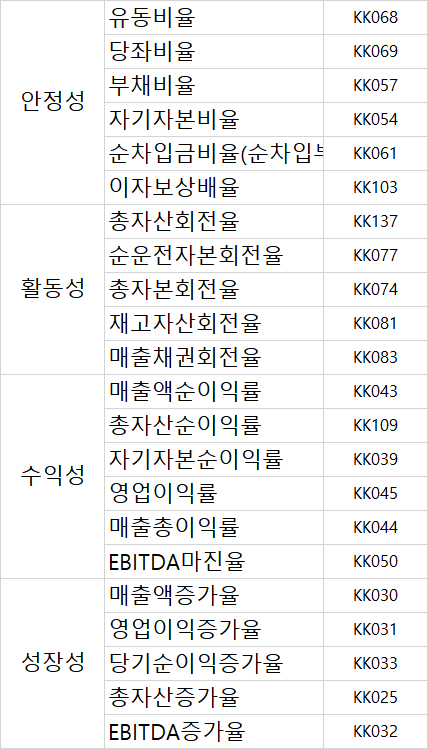

In [ ]:
# 변수 추출  재무비율 22 / 업종, SEG, 부도 -> 25개
df = data[['upjong', 'seg',	'KK068', 'KK069' , 'KK057', 'KK054', 'KK061', 'KK103', 'KK137', 'KK077', 'KK074','KK081',
           'KK083', 'KK043', 'KK109','KK039', 'KK045', 'KK044','KK050', 'KK030','KK031','KK033','KK025','KK032','budo']]

# 1. Missing value -> 더미 변수로 변환 (결측치 제거하기로 함) ->중앙값 대체

In [ ]:
df['KK068_M'] = np.where(df['KK068']=="nan", 1,0)
df['KK069_M'] = np.where(df['KK069']=="nan", 1,0)
df['KK057_M'] = np.where(df['KK057']=="nan", 1,0)
df['KK058_M'] = np.where(df['KK058']=="nan", 1,0)
df['KK137_M'] = np.where(df['KK137']=="nan", 1,0)
df['KK081_M'] = np.where(df['KK081']=="nan", 1,0)
df['KK083_M'] = np.where(df['KK083']=="nan", 1,0)
df['KK043_M'] = np.where(df['KK043']=="nan", 1,0)
df['KK053_M'] = np.where(df['KK053']=="nan", 1,0)
df['KK039_M'] = np.where(df['KK039']=="nan", 1,0)
df['KK030_M'] = np.where(df['KK030']=="nan", 1,0)
df['KK031_M'] = np.where(df['KK031']=="nan", 1,0)
df['KK033_M'] = np.where(df['KK033']=="nan", 1,0)
df['KK025_M'] = np.where(df['KK025']=="nan", 1,0)
print(df)

In [ ]:
df.isnull().sum()

upjong        0
seg           0
KK068     53965
KK069     53965
KK057     53965
KK054     53965
KK061     53965
KK103     53965
KK137     53965
KK077     53965
KK074     53965
KK081     53965
KK083     53965
KK043     53965
KK109     53965
KK039     53965
KK045     53965
KK044     53965
KK050     53965
KK030     53965
KK031     53965
KK033     53965
KK025     53965
KK032     53965
budo          0
dtype: int64

In [ ]:
data_missing = df.dropna(axis=0) #결측치 삭제 53967개 
data_missing = data_missing.reset_index()  #index 다시 
data_missing = data_missing.drop("index", axis =1)

In [ ]:
data.to_csv('/content/drive/MyDrive/data_m.csv',index=False) 

In [ ]:
data_missing.describe()

,upjong,seg,KK068,KK069,KK057,KK054,KK061,KK103,KK137,KK077,KK074,KK081,KK083,KK043,KK109,KK039,KK045,KK044,KK050,KK030,KK031,KK033,KK025,KK032,budo
count,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000
mean,3.1857,2.9941,109982.5415,108542.9657,56192.5343,52190.2391,36826.4054,17952990029.7088,2.4693,4169716.6258,2.4693,1129960.5989,804566.5435,-4778.5403,9.7311,-314.3712,-4381.7134,-608.8315,-2496.7047,2279584691.1884,455186246.0457,426875384.7809,385214380.3680,427292535.2294,0.0082
std,1.3652,1.0274,96278147.5024,96278095.2142,8022786.6067,68078722.2217,3866667.1973,37902062107.8573,96.3655,152664959.4554,96.3655,16894456.6039,204312720.9916,646059.3508,875.7038,889775.3086,407361.9243,161272.1490,538980.6544,14051093814.7348,6344593650.6685,6145094908.8427,5838911309.9256,6148082045.9392,0.0903
min,1.0000,1.0000,0.0000,0.0000,0.0000,-96875.2491,0.0000,-6093556.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-370023600.0000,-1130650.0000,-724554000.0000,-370023600.0000,-100957065.0000,-370023600.0000,-100.0000,-160693200.0000,-122039938.5000,-100.0000,-105767960.0000,0.0000
25%,2.0000,2.0000,114.3316,80.4557,37.5237,27.8118,3.0099,2.2813,0.8118,2.9644,0.8118,10.4701,5.0078,1.4469,1.8583,4.4480,1.7632,13.0115,2.5823,-10.4248,-51.4559,-53.4271,-2.3153,-51.1634,0.0000
50%,3.0000,3.0000,204.7564,164.1103,109.2547,47.7886,47.3603,8.0332,1.5310,7.2565,1.5310,48.9858,9.4715,3.7790,5.8221,13.7414,4.6322,21.6309,5.3898,7.9590,-0.2968,0.1240,8.0324,0.4673,0.0000
75%,4.0000,4.0000,474.7839,398.8565,259.5575,72.7147,155.9259,155.2191,2.7661,37.9499,2.7661,235817.0000,30.6007,7.3813,13.2925,32.4892,8.8851,42.4495,9.8104,41.7141,55.4440,58.4372,30.2769,57.2180,0.0000
max,5.0000,4.0000,88888888888.0000,88888888888.0000,7545671943.0000,88888888888.0000,3293612000.0000,99999999999.0000,111623.8864,31966513000.0000,111623.8864,9284787142.0000,88888888888.0000,242650355.0000,116522.5807,176656248.0000,6301.0000,934097.0000,275258436.0000,88888888888.0000,88888888888.0000,88888888888.0000,88888888888.0000,88888888888.0000,1.0000


In [ ]:
data_missing = np.array(data_missing.values.tolist())

In [ ]:
#missing value "중앙값"으로 대체

def median(data) :
    my_list = ['KK068', 'KK069','KK057','KK058','KK137', 
          'KK081','KK083', 'KK043','KK053','KK030', 
          'KK039','KK031','KK033', 'KK025']
    for w in my_list :
      print(w)
      median = data[w].median()
      print(median)
      median_index = np.where((data_m[w].isnull() == "True"))[0]
      data_m[w].loc[median_index]=median
      #data_mi = data[w].fillna(data[w].median(), inplace=True)
    return  data_m


In [ ]:
median(data_m)

In [ ]:
data_missing.isnull().sum()   #data_m = 결측치 중앙값으로 변경한 데이터

upjong    0
seg       0
KK068     0
KK069     0
KK057     0
KK054     0
KK061     0
KK103     0
KK137     0
KK077     0
KK074     0
KK081     0
KK083     0
KK043     0
KK109     0
KK039     0
KK045     0
KK044     0
KK050     0
KK030     0
KK031     0
KK033     0
KK025     0
KK032     0
budo      0
dtype: int64

# 2. 예외처리값 -> 더미변수로

In [ ]:
data_missing['KK068_E'] = data_missing['KK068'].apply(lambda x:1 if (x==88888888888) | (x==11111111111) | (x==22222222222) | (x==33333333333) | (x==44444444444) | (x==55555555555) | (x==66666666666) | (x==77777777777) else 0)
data_missing['KK069_E'] = data_missing['KK069'].apply(lambda x:1 if (x==88888888888) | (x==11111111111) | (x==22222222222) | (x==33333333333) | (x==44444444444) | (x==55555555555) | (x==66666666666) | (x==77777777777) else 0)
data_missing['KK057_E'] = data_missing['KK057'].apply(lambda x:1 if (x==88888888888) | (x==11111111111) | (x==22222222222) | (x==33333333333) | (x==44444444444) | (x==55555555555) | (x==66666666666) | (x==77777777777) else 0)
data_missing['KK054_E'] = data_missing['KK054'].apply(lambda x:1 if (x==88888888888) | (x==11111111111) | (x==22222222222) | (x==33333333333) | (x==44444444444) | (x==55555555555) | (x==66666666666) | (x==77777777777) else 0)
data_missing['KK061_E'] = data_missing['KK061'].apply(lambda x:1 if (x==88888888888) | (x==11111111111) | (x==22222222222) | (x==33333333333) | (x==44444444444) | (x==55555555555) | (x==66666666666) | (x==77777777777) else 0)
data_missing['KK103_E'] = data_missing['KK103'].apply(lambda x:1 if (x==88888888888) | (x==11111111111) | (x==22222222222) | (x==33333333333) | (x==44444444444) | (x==55555555555) | (x==66666666666) | (x==77777777777) else 0)
data_missing['KK137_E'] = data_missing['KK137'].apply(lambda x:1 if (x==88888888888) | (x==11111111111) | (x==22222222222) | (x==33333333333) | (x==44444444444) | (x==55555555555) | (x==66666666666) | (x==77777777777) else 0)
data_missing['KK077_E'] = data_missing['KK077'].apply(lambda x:1 if (x==88888888888) | (x==11111111111) | (x==22222222222) | (x==33333333333) | (x==44444444444) | (x==55555555555) | (x==66666666666) | (x==77777777777) else 0)
data_missing['KK074_E'] = data_missing['KK074'].apply(lambda x:1 if (x==88888888888) | (x==11111111111) | (x==22222222222) | (x==33333333333) | (x==44444444444) | (x==55555555555) | (x==66666666666) | (x==77777777777) else 0)
data_missing['KK081_E'] = data_missing['KK081'].apply(lambda x:1 if (x==88888888888) | (x==11111111111) | (x==22222222222) | (x==33333333333) | (x==44444444444) | (x==55555555555) | (x==66666666666) | (x==77777777777) else 0)
data_missing['KK083_E'] = data_missing['KK083'].apply(lambda x:1 if (x==88888888888) | (x==11111111111) | (x==22222222222) | (x==33333333333) | (x==44444444444) | (x==55555555555) | (x==66666666666) | (x==77777777777) else 0)
data_missing['KK043_E'] = data_missing['KK043'].apply(lambda x:1 if (x==88888888888) | (x==11111111111) | (x==22222222222) | (x==33333333333) | (x==44444444444) | (x==55555555555) | (x==66666666666) | (x==77777777777) else 0)
data_missing['KK109_E'] = data_missing['KK109'].apply(lambda x:1 if (x==88888888888) | (x==11111111111) | (x==22222222222) | (x==33333333333) | (x==44444444444) | (x==55555555555) | (x==66666666666) | (x==77777777777) else 0)
data_missing['KK039_E'] = data_missing['KK039'].apply(lambda x:1 if (x==88888888888) | (x==11111111111) | (x==22222222222) | (x==33333333333) | (x==44444444444) | (x==55555555555) | (x==66666666666) | (x==77777777777) else 0)
data_missing['KK045_E'] = data_missing['KK045'].apply(lambda x:1 if (x==88888888888) | (x==11111111111) | (x==22222222222) | (x==33333333333) | (x==44444444444) | (x==55555555555) | (x==66666666666) | (x==77777777777) else 0)
data_missing['KK044_E'] = data_missing['KK044'].apply(lambda x:1 if (x==88888888888) | (x==11111111111) | (x==22222222222) | (x==33333333333) | (x==44444444444) | (x==55555555555) | (x==66666666666) | (x==77777777777) else 0)
data_missing['KK050_E'] = data_missing['KK050'].apply(lambda x:1 if (x==88888888888) | (x==11111111111) | (x==22222222222) | (x==33333333333) | (x==44444444444) | (x==55555555555) | (x==66666666666) | (x==77777777777) else 0)
data_missing['KK030_E'] = data_missing['KK030'].apply(lambda x:1 if (x==88888888888) | (x==11111111111) | (x==22222222222) | (x==33333333333) | (x==44444444444) | (x==55555555555) | (x==66666666666) | (x==77777777777) else 0)
data_missing['KK031_E'] = data_missing['KK031'].apply(lambda x:1 if (x==88888888888) | (x==11111111111) | (x==22222222222) | (x==33333333333) | (x==44444444444) | (x==55555555555) | (x==66666666666) | (x==77777777777) else 0)
data_missing['KK033_E'] = data_missing['KK033'].apply(lambda x:1 if (x==88888888888) | (x==11111111111) | (x==22222222222) | (x==33333333333) | (x==44444444444) | (x==55555555555) | (x==66666666666) | (x==77777777777) else 0)
data_missing['KK025_E'] = data_missing['KK025'].apply(lambda x:1 if (x==88888888888) | (x==11111111111) | (x==22222222222) | (x==33333333333) | (x==44444444444) | (x==55555555555) | (x==66666666666) | (x==77777777777) else 0)
data_missing['KK032_E'] = data_missing['KK032'].apply(lambda x:1 if (x==88888888888) | (x==11111111111) | (x==22222222222) | (x==33333333333) | (x==44444444444) | (x==55555555555) | (x==66666666666) | (x==77777777777) else 0)


In [ ]:
data_missing

,upjong,seg,KK068,KK069,KK057,KK054,KK061,KK103,KK137,KK077,KK074,KK081,KK083,KK043,KK109,KK039,KK045,KK044,KK050,KK030,KK031,KK033,KK025,KK032,budo,KK068_E,KK069_E,KK057_E,KK054_E,KK061_E,KK103_E,KK137_E,KK077_E,KK074_E,KK081_E,KK083_E,KK043_E,KK109_E,KK039_E,KK045_E,KK044_E,KK050_E,KK030_E,KK031_E,KK033_E,KK025_E,KK032_E
0,2,1,53.7276,43.5822,739.7185,11.9088,652.3387,-1.0731,0.5561,18313007.0000,0.5561,8.5896,6.4718,-195.5685,-108.7587,-710.3736,-14.3689,10.6350,-59.4216,14.4755,958.3234,439.1131,-26.9267,94.6089,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,143.6603,131.4818,66.7212,59.9804,55.6223,-2.8417,0.2651,7892864.0000,0.2651,4.6463,3.5658,-114.7346,-30.4111,-81.0194,-67.6871,-21.0208,-93.4754,-56.9002,103.0291,-74.7146,14.1774,-30.9021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,83.3405,33.7064,145.1868,40.7852,93.2478,0.3454,1.2883,44745707.0000,1.2883,4.6179,7.7820,-2.1129,-2.7221,-7.8547,0.8772,11.8941,0.4757,23.8730,-62.7468,-562.2652,64.0518,-562.2652,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,58.6007,22.9891,224.1879,30.8463,158.9560,-0.6148,1.1344,45798574.0000,1.1344,4.6954,9.1990,-6.2936,-7.1398,-19.7456,-1.7815,11.9964,-3.1862,2.3530,-307.8767,204.8734,-12.9141,191.8157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,28.6500,17.9199,399.4271,20.0229,308.3607,-3.0527,1.3288,47956122.0000,1.3288,8.6733,12.4996,-9.7312,-12.9312,-50.3965,-7.4164,4.7903,-7.3124,4.7110,335.9219,61.9042,-7.9574,69.1489,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704790,4,4,192.0671,121.3230,74.1035,57.4372,0.0000,99999999999.0000,4.3259,8.8991,4.3259,10.2434,11.7739,5.4923,23.7589,35.2866,5.9130,9.8312,5.9151,25.2984,25.6399,72.2572,-0.5151,26.3417,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1704791,4,4,173.3397,113.8837,78.8785,55.9039,0.0000,99999999999.0000,3.9134,10.9727,3.9134,13.9795,8.4980,4.3747,17.1200,30.1590,6.2725,11.1463,4.3747,-19.7402,-14.8606,-36.0711,-22.1011,-40.6411,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1704792,4,4,186.9412,175.3198,85.8319,53.8121,0.0000,99999999999.0000,4.8476,13.1533,4.8476,37.7282,11.7310,5.5495,26.9014,49.2866,6.1827,11.0018,5.5495,47.4465,45.3353,87.0397,71.8340,87.0397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1704793,4,4,250.0361,250.0361,55.7808,64.1928,0.0000,99999999999.0000,4.2705,9.0223,4.2705,182.9886,11.2336,5.8141,24.8293,41.6333,7.0344,12.4637,5.8141,26.9161,44.4006,32.9681,27.9048,32.9681,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_missing['KK068_E']

0          0
1          0
2          0
3          0
4          0
          ..
1704790    0
1704791    0
1704792    0
1704793    0
1704794    0
Name: KK068_E, Length: 1704795, dtype: int64

In [ ]:
data_missing.loc[data_missing['KK068_E'] == 1]

,upjong,seg,KK068,KK069,KK057,KK054,KK061,KK103,KK137,KK077,KK074,KK081,KK083,KK043,KK109,KK039,KK045,KK044,KK050,KK030,KK031,KK033,KK025,KK032,budo,KK068_E,KK069_E,KK057_E,KK054_E,KK061_E,KK103_E,KK137_E,KK077_E,KK074_E,KK081_E,KK083_E,KK043_E,KK109_E,KK039_E,KK045_E,KK044_E,KK050_E,KK030_E,KK031_E,KK033_E,KK025_E,KK032_E
753769,1,3,88888888888.0000,88888888888.0000,249.9123,28.5786,236.2611,1.2393,0.1984,1.3081,0.1984,3.3470,14.4549,2.8381,0.5632,1.9466,16.7651,20.7640,16.3656,-59.5120,-18.3482,-66.2697,4.5541,-66.2697,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1478337,5,4,88888888888.0000,88888888888.0000,94.4672,51.4226,94.0555,2.2817,0.0976,81000.0000,0.0976,81000.0000,81000.0000,21.4531,2.0947,4.1964,42.8235,100.0000,40.2210,-5.5944,-8.9938,-4.6896,-0.6131,-4.6896,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_e = data_missing # data_e = 예외값 더미변수 만든 데이터

In [ ]:
data_e.head()

,upjong,seg,KK068,KK069,KK057,KK054,KK061,KK103,KK137,KK077,KK074,KK081,KK083,KK043,KK109,KK039,KK045,KK044,KK050,KK030,KK031,KK033,KK025,KK032,budo,KK068_E,KK069_E,KK057_E,KK054_E,KK061_E,KK103_E,KK137_E,KK077_E,KK074_E,KK081_E,KK083_E,KK043_E,KK109_E,KK039_E,KK045_E,KK044_E,KK050_E,KK030_E,KK031_E,KK033_E,KK025_E,KK032_E
0,2,1,53.7276,43.5822,739.7185,11.9088,652.3387,-1.0731,0.5561,18313007.0000,0.5561,8.5896,6.4718,-195.5685,-108.7587,-710.3736,-14.3689,10.6350,-59.4216,14.4755,958.3234,439.1131,-26.9267,94.6089,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,143.6603,131.4818,66.7212,59.9804,55.6223,-2.8417,0.2651,7892864.0000,0.2651,4.6463,3.5658,-114.7346,-30.4111,-81.0194,-67.6871,-21.0208,-93.4754,-56.9002,103.0291,-74.7146,14.1774,-30.9021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,83.3405,33.7064,145.1868,40.7852,93.2478,0.3454,1.2883,44745707.0000,1.2883,4.6179,7.7820,-2.1129,-2.7221,-7.8547,0.8772,11.8941,0.4757,23.8730,-62.7468,-562.2652,64.0518,-562.2652,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,58.6007,22.9891,224.1879,30.8463,158.9560,-0.6148,1.1344,45798574.0000,1.1344,4.6954,9.1990,-6.2936,-7.1398,-19.7456,-1.7815,11.9964,-3.1862,2.3530,-307.8767,204.8734,-12.9141,191.8157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,28.6500,17.9199,399.4271,20.0229,308.3607,-3.0527,1.3288,47956122.0000,1.3288,8.6733,12.4996,-9.7312,-12.9312,-50.3965,-7.4164,4.7903,-7.3124,4.7110,335.9219,61.9042,-7.9574,69.1489,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.set_option('display.max_rows', 500)

# 3. 이상치 -> 찾아내고 -> 예외처리 된 값 제외한 진짜 이상치 값 찾기

In [ ]:
index_tmp = outlier_iqr(df_tmp, 'KK068')[0]

index_e_tmp = np.where(df_tmp['KK068_E'] == 1)[0]
index_e_tmp
print(len(index_e_tmp))

z = list(set(index_tmp)-set(index_e_tmp))
print(len(index_tmp))
print(len(z))

IQR은 158.99240135949998 이다.
lower bound 값은 -725.045307847 이다.
upper bound 값은 1023.8711071074999 이다.
0
5429
5429


In [ ]:
df_tmp=data_e[100000:200000]
df_tmp['KK068_O']=0


In [ ]:
df_tmp

In [ ]:
i=0
for i in range(0,len(z)):
  df_tmp.iloc[z[i],46]=1

In [ ]:
#for 문으로 전체 처리 (이상치  인덱스 구하고 -> 예외값 인덱스 구하고 -> 각 인덱스 빼주고 -> 맞는 인덱스에 붙이기)

#이상치 값 찾기 (iqr , 25%, 75% 이상, 이하 삭제)  -> 5배

def outlier_iqr(data): 
  # lower, upper 글로벌 변수 선언하기     
    #global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.nanpercentile(data,[25, 75] )       
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 3          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')   
     
    
    index = np.where((data > upper) | (data < lower))   #만족하는 데이터의 위치(인덱스) 반환
    
    

    # 이상치 총 개수 구하기
    return  index

In [ ]:
len(outlier_iqr(data_e['KK068'])[0])

IQR은 360.45229365499995 이다.
lower bound 값은 -967.0253201099998 이다.
upper bound 값은 1556.140735475 이다.


159200

In [ ]:
def out_loop(data) :
    my_list = ['KK068', 'KK069' , 'KK057', 'KK054', 'KK061', 'KK103', 'KK137', 'KK077', 'KK074','KK081',
           'KK083', 'KK043', 'KK109','KK039', 'KK045', 'KK044','KK050', 'KK030','KK031','KK033','KK025','KK032']
    
    outlier_index = []
    for w in my_list :
      print(w)
      i = outlier_iqr(data[w])[0]
      outlier_index.append(i)
    return outlier_index  #각 변수별 나온 이상치 인덱스 합친거 14차원 배열로 

In [ ]:
outlier_index = out_loop(data_e)

KK068
IQR은 360.45229365499995 이다.
lower bound 값은 -967.0253201099998 이다.
upper bound 값은 1556.140735475 이다.
KK069
IQR은 318.4008122985 이다.
lower bound 값은 -874.746768359 이다.
upper bound 값은 1354.0589177305 이다.
KK057
IQR은 222.03377864200002 이다.
lower bound 값은 -628.577623858 이다.
upper bound 값은 925.6588266360001 이다.
KK054
IQR은 44.90288237300001 이다.
lower bound 값은 -106.89686763750004 이다.
upper bound 값은 207.42330897350004 이다.
KK061
IQR은 152.9160706483 이다.
lower bound 값은 -455.7383593882 이다.
upper bound 값은 614.6741351499 이다.
KK103
IQR은 152.93785332079997 이다.
lower bound 값은 -456.5323002282 이다.
upper bound 값은 614.0326730173999 이다.
KK137
IQR은 1.9543056280500002 이다.
lower bound 값은 -5.05109149095 이다.
upper bound 값은 8.6290479054 이다.
KK077
IQR은 34.9854782393 이다.
lower bound 값은 -101.9920421987 이다.
upper bound 값은 142.9063054764 이다.
KK074
IQR은 1.9543056280500002 이다.
lower bound 값은 -5.05109149095 이다.
upper bound 값은 8.6290479054 이다.
KK081
IQR은 235806.529917212 이다.
lower bound 값은 -707409.119668848 이다.
upper bo

In [ ]:
print(np.shape(out_loop(data_e))) #총 22개 변수
print(len(out_loop(data_e)[0]))  #각 (0번째)변수별 인덱스 개수

KK068
IQR은 360.45229365499995 이다.
lower bound 값은 -967.0253201099998 이다.
upper bound 값은 1556.140735475 이다.
KK069
IQR은 318.4008122985 이다.
lower bound 값은 -874.746768359 이다.
upper bound 값은 1354.0589177305 이다.
KK057
IQR은 222.03377864200002 이다.
lower bound 값은 -628.577623858 이다.
upper bound 값은 925.6588266360001 이다.
KK054
IQR은 44.90288237300001 이다.
lower bound 값은 -106.89686763750004 이다.
upper bound 값은 207.42330897350004 이다.
KK061
IQR은 152.9160706483 이다.
lower bound 값은 -455.7383593882 이다.
upper bound 값은 614.6741351499 이다.
KK103
IQR은 152.93785332079997 이다.
lower bound 값은 -456.5323002282 이다.
upper bound 값은 614.0326730173999 이다.
KK137
IQR은 1.9543056280500002 이다.
lower bound 값은 -5.05109149095 이다.
upper bound 값은 8.6290479054 이다.
KK077
IQR은 34.9854782393 이다.
lower bound 값은 -101.9920421987 이다.
upper bound 값은 142.9063054764 이다.
KK074
IQR은 1.9543056280500002 이다.
lower bound 값은 -5.05109149095 이다.
upper bound 값은 8.6290479054 이다.
KK081
IQR은 235806.529917212 이다.
lower bound 값은 -707409.119668848 이다.
upper bo

In [ ]:
def exp_loop(data) :
    list_1 = ['KK068_E', 'KK069_E' , 'KK057_E', 'KK054_E', 'KK061_E', 'KK103_E', 'KK137_E', 'KK077_E', 'KK074_E','KK081_E',
           'KK083_E', 'KK043_E', 'KK109_E','KK039_E', 'KK045_E', 'KK044_E','KK050_E', 'KK030_E','KK031_E','KK033_E','KK025_E','KK032_E']
    
    exception_index=[]
    for w in list_1 :
      b = np.where(data[w] == 1)[0]
      exception_index.append(b)
    return exception_index  #각 변수별 나온 예외값 인덱스 합친거 

In [ ]:
exception_index = exp_loop(data_e)

In [ ]:
exception_index

[array([ 753769, 1478337]),
 array([ 753769, 1478337]),
 array([], dtype=int64),
 array([173974]),
 array([], dtype=int64),
 array([    290,     416,     627, ..., 1704724, 1704765, 1704766]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([ 198704,  380440,  428358,  473470,  473471,  501762,  501763,
         754759, 1273840]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([    722,    1476,    2035, ..., 1704256, 1704338, 1704569]),
 array([    722,   10455,   13677, ..., 1704256, 1704338, 1704569]),
 array([  13677,   24411,   36613, ..., 1704256, 1704338, 1704569]),
 array([  13677,   24411,   36613, ..., 1704256, 1704338, 1704569]),
 array([  10455,   13677,   18551, ..., 1704256, 1704338, 1704569])]

In [ ]:
print(np.shape(exception_index))
print(exception_index)
print(len(exception_index[0]))

(22,)
[array([ 753769, 1478337]), array([ 753769, 1478337]), array([], dtype=int64), array([173974]), array([], dtype=int64), array([    290,     416,     627, ..., 1704724, 1704765, 1704766]), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([ 198704,  380440,  428358,  473470,  473471,  501762,  501763,
        754759, 1273840]), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([    722,    1476,    2035, ..., 1704256, 1704338, 1704569]), array([    722,   10455,   13677, ..., 1704256, 1704338, 1704569]), array([  13677,   24411,   36613, ..., 1704256, 1704338, 1704569]), array([  13677,   24411,   36613, ..., 1704256, 1704338, 1704569]), array([  10455,   13677,   18551, ..., 1704256, 1704338, 1704569])]
2


In [ ]:
real_outlier_index = []        #진짜 이상치 (전체 이상치-예외인덱스 = 진짜이상치)
i=0
for i in range(0,np.shape(outlier_index)[0]) : 
  c = list(set((outlier_index)[i])-set((exception_index)[i]))
  real_outlier_index.append(c)

In [ ]:
np.shape(real_outlier_index)

(22,)

In [ ]:
list_oo = ['KK068_O', 'KK069_O' , 'KK057_O', 'KK054_O', 'KK061_O', 'KK103_O', 'KK137_O', 'KK077_O', 'KK074_O','KK081_O',
           'KK083_O', 'KK043_O', 'KK109_O','KK039_O', 'KK045_O', 'KK044_O','KK050_O', 'KK030_O','KK031_O','KK033_O','KK025_O','KK032_O']

for i in list_oo :
  data_e[i]=0
#진짜아웃라이어 더미변수 변수에 일단 모두 0 할당

In [ ]:
data_e['KK068_O'].sum()

0

In [ ]:
print(len(outlier_index[0]))
print(len(exception_index[0]))
print(len(real_outlier_index[0]))    #119503개 이상치 - 2개 예외값 = 119501 진짜 이상치 개수

159200
2
159198


In [ ]:
data_e.loc[real_outlier_index[0],['KK068_O']]  #0 할당된거 확인

,KK068_O
1572865,0
1572866,0
1048583,0
1048584,0
1572871,0
...,...
1572848,0
1572851,0
1572853,0
1572854,0


In [ ]:
#생성된 이상치더미변수에 진짜 이상치 인덱스 위치(행,렬) 찾아서 1 넣기
o_list = ['KK068_O', 'KK069_O' , 'KK057_O', 'KK054_O', 'KK061_O', 'KK103_O', 'KK137_O', 'KK077_O', 'KK074_O','KK081_O',
           'KK083_O', 'KK043_O', 'KK109_O','KK039_O', 'KK045_O', 'KK044_O','KK050_O', 'KK030_O','KK031_O','KK033_O','KK025_O','KK032_O']
num = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
for i,w in zip(num,o_list):
   data_e.loc[real_outlier_index[i],[w]]=1

In [ ]:
print(len(outlier_index[0]))
print(len(exception_index[0]))
print(len(real_outlier_index[0]))

159200
2
159198


In [ ]:
data_e['KK068_O'].sum()  #1 합계 = 진짜아웃라이어인덱스 길이랑 동일해야 함

159198

In [ ]:
print(len(outlier_index[13]))
print(len(exception_index[13]))
print(len(real_outlier_index[13]))

109690
0
109690


In [ ]:
data_e['KK068_O'].sum()

159198

In [ ]:
data_o = data_e  #진짜 이상치 더미변수까지 된 데이터

In [ ]:
data_o_f = data_e

In [ ]:
dataframe = pd.DataFrame(data_o)

In [ ]:
dataframe.to_csv('data_outlier.csv',index=False)   #data_o 저장

# 진짜 아웃라이어 중 UPPER 이상인거 / LOWER 이하인거 더미 추가 (추가 작업)

In [ ]:
data_o.head()

,upjong,seg,KK068,KK069,KK057,KK054,KK061,KK103,KK137,KK077,KK074,KK081,KK083,KK043,KK109,KK039,KK045,KK044,KK050,KK030,KK031,KK033,KK025,KK032,budo,KK068_E,KK069_E,KK057_E,KK054_E,KK061_E,KK103_E,KK137_E,KK077_E,KK074_E,KK081_E,KK083_E,KK043_E,KK109_E,KK039_E,KK045_E,KK044_E,KK050_E,KK030_E,KK031_E,KK033_E,KK025_E,KK032_E,KK068_O,KK069_O,KK057_O,KK054_O,KK061_O,KK103_O,KK137_O,KK077_O,KK074_O,KK081_O,KK083_O,KK043_O,KK109_O,KK039_O,KK045_O,KK044_O,KK050_O,KK030_O,KK031_O,KK033_O,KK025_O,KK032_O
0,2,1,53.7276,43.5822,739.7185,11.9088,652.3387,-1.0731,0.5561,18313007.0000,0.5561,8.5896,6.4718,-195.5685,-108.7587,-710.3736,-14.3689,10.6350,-59.4216,14.4755,958.3234,439.1131,-26.9267,94.6089,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,1,0,0
1,2,1,143.6603,131.4818,66.7212,59.9804,55.6223,-2.8417,0.2651,7892864.0000,0.2651,4.6463,3.5658,-114.7346,-30.4111,-81.0194,-67.6871,-21.0208,-93.4754,-56.9002,103.0291,-74.7146,14.1774,-30.9021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0
2,1,1,83.3405,33.7064,145.1868,40.7852,93.2478,0.3454,1.2883,44745707.0000,1.2883,4.6179,7.7820,-2.1129,-2.7221,-7.8547,0.8772,11.8941,0.4757,23.8730,-62.7468,-562.2652,64.0518,-562.2652,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,1,1,58.6007,22.9891,224.1879,30.8463,158.9560,-0.6148,1.1344,45798574.0000,1.1344,4.6954,9.1990,-6.2936,-7.1398,-19.7456,-1.7815,11.9964,-3.1862,2.3530,-307.8767,204.8734,-12.9141,191.8157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,28.6500,17.9199,399.4271,20.0229,308.3607,-3.0527,1.3288,47956122.0000,1.3288,8.6733,12.4996,-9.7312,-12.9312,-50.3965,-7.4164,4.7903,-7.3124,4.7110,335.9219,61.9042,-7.9574,69.1489,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
list_oo = ['KK068_O_U', 'KK069_O_U' , 'KK057_O_U', 'KK054_O_U', 'KK061_O_U', 'KK103_O_U', 'KK137_O_U', 'KK077_O_U', 'KK074_O_U','KK081_O_U',
           'KK083_O_U', 'KK043_O_U', 'KK109_O_U','KK039_O_U', 'KK045_O_U', 'KK044_O_U','KK050_O_U', 'KK030_O_U','KK031_O_U','KK033_O_U','KK025_O_U','KK032_O_U',
           'KK068_O_L', 'KK069_O_L' , 'KK057_O_L', 'KK054_O_L', 'KK061_O_L', 'KK103_O_L', 'KK137_O_L', 'KK077_O_L', 'KK074_O_L','KK081_O_L',
           'KK083_O_L', 'KK043_O_L', 'KK109_O_L','KK039_O_L', 'KK045_O_L', 'KK044_O_L','KK050_O_L', 'KK030_O_L','KK031_O_L','KK033_O_L','KK025_O_L','KK032_O_L']

for i in list_oo :
  data_o[i]=0
#진짜아웃라이어 더미변수 변수에 일단 모두 0 할당

In [ ]:
data_o

,upjong,seg,KK068,KK069,KK057,KK054,KK061,KK103,KK137,KK077,KK074,KK081,KK083,KK043,KK109,KK039,KK045,KK044,KK050,KK030,KK031,KK033,KK025,KK032,budo,KK068_E,KK069_E,KK057_E,KK054_E,KK061_E,KK103_E,KK137_E,KK077_E,KK074_E,KK081_E,KK083_E,KK043_E,KK109_E,KK039_E,KK045_E,...,KK061_O_U,KK103_O_U,KK137_O_U,KK077_O_U,KK074_O_U,KK081_O_U,KK083_O_U,KK043_O_U,KK109_O_U,KK039_O_U,KK045_O_U,KK044_O_U,KK050_O_U,KK030_O_U,KK031_O_U,KK033_O_U,KK025_O_U,KK032_O_U,KK068_O_L,KK069_O_L,KK057_O_L,KK054_O_L,KK061_O_L,KK103_O_L,KK137_O_L,KK077_O_L,KK074_O_L,KK081_O_L,KK083_O_L,KK043_O_L,KK109_O_L,KK039_O_L,KK045_O_L,KK044_O_L,KK050_O_L,KK030_O_L,KK031_O_L,KK033_O_L,KK025_O_L,KK032_O_L
0,2,1,53.7276,43.5822,739.7185,11.9088,652.3387,-1.0731,0.5561,18313007.0000,0.5561,8.5896,6.4718,-195.5685,-108.7587,-710.3736,-14.3689,10.6350,-59.4216,14.4755,958.3234,439.1131,-26.9267,94.6089,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,143.6603,131.4818,66.7212,59.9804,55.6223,-2.8417,0.2651,7892864.0000,0.2651,4.6463,3.5658,-114.7346,-30.4111,-81.0194,-67.6871,-21.0208,-93.4754,-56.9002,103.0291,-74.7146,14.1774,-30.9021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,83.3405,33.7064,145.1868,40.7852,93.2478,0.3454,1.2883,44745707.0000,1.2883,4.6179,7.7820,-2.1129,-2.7221,-7.8547,0.8772,11.8941,0.4757,23.8730,-62.7468,-562.2652,64.0518,-562.2652,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,58.6007,22.9891,224.1879,30.8463,158.9560,-0.6148,1.1344,45798574.0000,1.1344,4.6954,9.1990,-6.2936,-7.1398,-19.7456,-1.7815,11.9964,-3.1862,2.3530,-307.8767,204.8734,-12.9141,191.8157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,28.6500,17.9199,399.4271,20.0229,308.3607,-3.0527,1.3288,47956122.0000,1.3288,8.6733,12.4996,-9.7312,-12.9312,-50.3965,-7.4164,4.7903,-7.3124,4.7110,335.9219,61.9042,-7.9574,69.1489,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704790,4,4,192.0671,121.3230,74.1035,57.4372,0.0000,99999999999.0000,4.3259,8.8991,4.3259,10.2434,11.7739,5.4923,23.7589,35.2866,5.9130,9.8312,5.9151,25.2984,25.6399,72.2572,-0.5151,26.3417,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1704791,4,4,173.3397,113.8837,78.8785,55.9039,0.0000,99999999999.0000,3.9134,10.9727,3.9134,13.9795,8.4980,4.3747,17.1200,30.1590,6.2725,11.1463,4.3747,-19.7402,-14.8606,-36.0711,-22.1011,-40.6411,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1704792,4,4,186.9412,175.3198,85.8319,53.8121,0.0000,99999999999.0000,4.8476,13.1533,4.8476,37.7282,11.7310,5.5495,26.9014,49.2866,6.1827,11.0018,5.5495,47.4465,45.3353,87.0397,71.8340,87.0397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1704793,4,4,250.0361,250.0361,55.7808,64.1928,0.0000,99999999999.0000,4.2705,9.0223,4.2705,182.9886,11.2336,5.8141,24.8293,41.6333,7.0344,12.4637,5.8141,26.9161,44.4006,32.9681,27.9048,32.9681,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(data_o['KK068_O_L'].sum())
print(data_e['KK068_O_U'].sum())

0
0


In [ ]:
 my_list = ['KK068', 'KK069' , 'KK057', 'KK054', 'KK061', 'KK103', 'KK137', 'KK077', 'KK074','KK081',
           'KK083', 'KK043', 'KK109','KK039', 'KK045', 'KK044','KK050', 'KK030','KK031','KK033','KK025','KK032'] 
upper=[]
lower=[]
for i in my_list:
  q25, q75 = np.percentile(data_o[i],[25, 75] ) 
  Iqr = q75 - q25   
  cut_off = Iqr * 3
  lo= q25 - cut_off
  up = q75 + cut_off
  upper.append(up)
  lower.append(lo)

In [ ]:
print(upper[0])
print(lower[0])

1556.140735475
-967.0253201099998


In [ ]:
my_list = ['KK068', 'KK069' , 'KK057', 'KK054', 'KK061', 'KK103', 'KK137', 'KK077', 'KK074','KK081',
           'KK083', 'KK043', 'KK109','KK039', 'KK045', 'KK044','KK050', 'KK030','KK031','KK033','KK025','KK032']
o_list = ['KK068_O', 'KK069_O' , 'KK057_O', 'KK054_O', 'KK061_O', 'KK103_O', 'KK137_O', 'KK077_O', 'KK074_O','KK081_O',
           'KK083_O', 'KK043_O', 'KK109_O','KK039_O', 'KK045_O', 'KK044_O','KK050_O', 'KK030_O','KK031_O','KK033_O','KK025_O','KK032_O']
          
upper_index=[]
lower_index=[]
for i,w in zip(my_list,o_list) : 
  q25, q75 = np.percentile(data_o[i],[25, 75] ) 
  Iqr = q75 - q25   
  cut_off = Iqr * 3
  lower_r, upper_r = q25 - cut_off, q75 + cut_off
  upper_i = np.where((data_o[i] > upper_r) & (data_o[w]==1))[0]
  lower_i = np.where((data_o[i] < lower_r) & (data_o[w]==1))[0]
  upper_index.append(upper_i)
  lower_index.append(lower_i)
  

In [ ]:
upper_index

[array([    214,     463,     464, ..., 1704762, 1704769, 1704784]),
 array([      9,     214,     463, ..., 1704735, 1704759, 1704769]),
 array([     42,      47,      48, ..., 1704652, 1704663, 1704748]),
 array([], dtype=int64),
 array([      0,      42,      48, ..., 1704664, 1704748, 1704781]),
 array([      9,      88,      89, ..., 1704792, 1704793, 1704794]),
 array([   3600,    3601,    3602, ..., 1704765, 1704766, 1704767]),
 array([      0,       1,       2, ..., 1704783, 1704784, 1704786]),
 array([   3600,    3601,    3602, ..., 1704765, 1704766, 1704767]),
 array([    214,     443,     501, ..., 1704640, 1704641, 1704754]),
 array([    709,     710,     711, ..., 1704783, 1704784, 1704785]),
 array([     60,      69,      72, ..., 1704747, 1704750, 1704763]),
 array([     69,      72,     291, ..., 1704767, 1704776, 1704786]),
 array([     69,     291,     325, ..., 1704739, 1704745, 1704786]),
 array([    167,     292,     344, ..., 1704672, 1704747, 1704763]),
 array([1

In [ ]:
lower_index

In [ ]:
np.where((data_o['KK054'] < -106.89686763750004) & (data_o['KK054_O']==1))[0]

In [ ]:
data_o.loc[data_o['KK054_O'] == 1]

In [ ]:
data_o.loc[lower_index[3]]

In [ ]:
#생성된 이상치더미변수에 진짜 이상치 인덱스 위치(행,렬) 찾아서 1 넣기
o_list = ['KK068_O_U', 'KK069_O_U' , 'KK057_O_U', 'KK054_O_U', 'KK061_O_U', 'KK103_O_U', 'KK137_O_U', 'KK077_O_U', 'KK074_O_U','KK081_O_U',
           'KK083_O_U', 'KK043_O_U', 'KK109_O_U','KK039_O_U', 'KK045_O_U', 'KK044_O_U','KK050_O_U', 'KK030_O_U','KK031_O_U','KK033_O_U','KK025_O_U','KK032_O_U']
num = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
for i,w in zip(num,o_list):
   data_o.loc[upper_index[i],[w]]=1

In [ ]:
print(len(upper_index[1]))
print(data_o['KK069_O_U'].sum())

153241
153241


In [ ]:
print(len(upper_index[0]))
print(data_o['KK068_O_U'].sum())

159198
159198


In [ ]:
#생성된 이상치더미변수에 진짜 이상치 인덱스 위치(행,렬) 찾아서 1 넣기
o_list = ['KK068_O_L', 'KK069_O_L' , 'KK057_O_L', 'KK054_O_L', 'KK061_O_L', 'KK103_O_L', 'KK137_O_L', 'KK077_O_L', 'KK074_O_L','KK081_O_L',
           'KK083_O_L', 'KK043_O_L', 'KK109_O_L','KK039_O_L', 'KK045_O_L', 'KK044_O_L','KK050_O_L', 'KK030_O_L','KK031_O_L','KK033_O_L','KK025_O_L','KK032_O_L']
num = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
for i,w in zip(num,o_list):
   data_o.loc[lower_index[i],[w]]=1

In [ ]:
print(len(lower_index[0]))
print(data_o['KK068_O_L'].sum())

0
0


In [ ]:
print(len(lower_index[1]))
print(data_o['KK069_O_L'].sum())

0
0


In [ ]:
print(len(lower_index[3]))
print(data_o['KK054_O_L'].sum())

567
567


In [ ]:
data_o1 = data_o

# 진짜 아웃라이어는 upper, lower 경계값으로 대체(예외값 바꾸기 전에 먼저 해야 함)

In [ ]:
data_o =pd.read_table('/content/drive/MyDrive/data_outlier.csv',sep=',', encoding='euc-kr')

In [ ]:
data_o1.head()

,upjong,seg,KK068,KK069,KK057,KK054,KK061,KK103,KK137,KK077,KK074,KK081,KK083,KK043,KK109,KK039,KK045,KK044,KK050,KK030,KK031,KK033,KK025,KK032,budo,KK068_E,KK069_E,KK057_E,KK054_E,KK061_E,KK103_E,KK137_E,KK077_E,KK074_E,KK081_E,KK083_E,KK043_E,KK109_E,KK039_E,KK045_E,...,KK061_O_U,KK103_O_U,KK137_O_U,KK077_O_U,KK074_O_U,KK081_O_U,KK083_O_U,KK043_O_U,KK109_O_U,KK039_O_U,KK045_O_U,KK044_O_U,KK050_O_U,KK030_O_U,KK031_O_U,KK033_O_U,KK025_O_U,KK032_O_U,KK068_O_L,KK069_O_L,KK057_O_L,KK054_O_L,KK061_O_L,KK103_O_L,KK137_O_L,KK077_O_L,KK074_O_L,KK081_O_L,KK083_O_L,KK043_O_L,KK109_O_L,KK039_O_L,KK045_O_L,KK044_O_L,KK050_O_L,KK030_O_L,KK031_O_L,KK033_O_L,KK025_O_L,KK032_O_L
0,2,1,53.7276,43.5822,739.7185,11.9088,652.3387,-1.0731,0.5561,18313007.0000,0.5561,8.5896,6.4718,-195.5685,-108.7587,-710.3736,-14.3689,10.6350,-59.4216,14.4755,958.3234,439.1131,-26.9267,94.6089,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0
1,2,1,143.6603,131.4818,66.7212,59.9804,55.6223,-2.8417,0.2651,7892864.0000,0.2651,4.6463,3.5658,-114.7346,-30.4111,-81.0194,-67.6871,-21.0208,-93.4754,-56.9002,103.0291,-74.7146,14.1774,-30.9021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0
2,1,1,83.3405,33.7064,145.1868,40.7852,93.2478,0.3454,1.2883,44745707.0000,1.2883,4.6179,7.7820,-2.1129,-2.7221,-7.8547,0.8772,11.8941,0.4757,23.8730,-62.7468,-562.2652,64.0518,-562.2652,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,1,1,58.6007,22.9891,224.1879,30.8463,158.9560,-0.6148,1.1344,45798574.0000,1.1344,4.6954,9.1990,-6.2936,-7.1398,-19.7456,-1.7815,11.9964,-3.1862,2.3530,-307.8767,204.8734,-12.9141,191.8157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,28.6500,17.9199,399.4271,20.0229,308.3607,-3.0527,1.3288,47956122.0000,1.3288,8.6733,12.4996,-9.7312,-12.9312,-50.3965,-7.4164,4.7903,-7.3124,4.7110,335.9219,61.9042,-7.9574,69.1489,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
 my_list = ['KK068', 'KK069','KK057','KK058','KK137', 
          'KK081','KK083', 'KK043','KK053','KK030', 
          'KK039','KK031','KK033', 'KK025'] 
upper=[]
lower=[]
for i in my_list:
  q25, q75 = np.percentile(data_o[i],[25, 75] ) 
  Iqr = q75 - q25   
  cut_off = Iqr * 3
  lo= q25 - cut_off
  up = q75 + cut_off
  upper.append(up)
  lower.append(lo)

In [ ]:
print(upper[0])
print(lower[0])

1556.140735475
-967.0253201099998


In [ ]:
my_list = ['KK068', 'KK069' , 'KK057', 'KK054', 'KK061', 'KK103', 'KK137', 'KK077', 'KK074','KK081',
           'KK083', 'KK043', 'KK109','KK039', 'KK045', 'KK044','KK050', 'KK030','KK031','KK033','KK025','KK032']
o_list = ['KK068_O', 'KK069_O' , 'KK057_O', 'KK054_O', 'KK061_O', 'KK103_O', 'KK137_O', 'KK077_O', 'KK074_O','KK081_O',
           'KK083_O', 'KK043_O', 'KK109_O','KK039_O', 'KK045_O', 'KK044_O','KK050_O', 'KK030_O','KK031_O','KK033_O','KK025_O','KK032_O']
          
upper_index=[]
lower_index=[]
for i,w in zip(my_list,o_list) : 
  q25, q75 = np.percentile(data_o[i],[25, 75] ) 
  Iqr = q75 - q25   
  cut_off = Iqr * 3
  lower_r, upper_r = q25 - cut_off, q75 + cut_off
  upper_i = np.where((data_o[i] > upper_r) & (data_o[w]==1))[0]
  lower_i = np.where((data_o[i] < lower_r) & (data_o[w]==1))[0]
  upper_index.append(upper_i)
  lower_index.append(lower_i)
  
  #data_o[i].loc[upper_index]=upper
  #data_o[i].loc[lower_index]=lower

In [ ]:
upper_index

[array([    214,     463,     464, ..., 1704762, 1704769, 1704784]),
 array([      9,     214,     463, ..., 1704735, 1704759, 1704769]),
 array([     42,      47,      48, ..., 1704652, 1704663, 1704748]),
 array([      0,      41,      42, ..., 1704651, 1704652, 1704746]),
 array([   3600,    3601,    3602, ..., 1704765, 1704766, 1704767]),
 array([    214,     443,     501, ..., 1704640, 1704641, 1704754]),
 array([    709,     710,     711, ..., 1704783, 1704784, 1704785]),
 array([     60,      69,      72, ..., 1704747, 1704750, 1704763]),
 array([     69,      72,     291, ..., 1704767, 1704776, 1704786]),
 array([    291,     443,     711, ..., 1704738, 1704753, 1704754]),
 array([     69,     291,     325, ..., 1704739, 1704745, 1704786]),
 array([      0,      20,      56, ..., 1704591, 1704713, 1704726]),
 array([      0,       6,      24, ..., 1704592, 1704649, 1704713]),
 array([    259,    1448,    1614, ..., 1704753, 1704768, 1704784])]

In [ ]:
lower_index

[array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([      0,       1,      67, ..., 1704685, 1704723, 1704724]),
 array([      0,      68,      74, ..., 1704498, 1704600, 1704619]),
 array([], dtype=int64),
 array([      0,       1,      33, ..., 1704086, 1704249, 1704619]),
 array([     41,      43,      49, ..., 1704689, 1704753, 1704767]),
 array([      2,      19,      38, ..., 1704278, 1704532, 1704599]),
 array([], dtype=int64)]

In [ ]:
my_list = ['KK068', 'KK069' , 'KK057', 'KK054', 'KK061', 'KK103', 'KK137', 'KK077', 'KK074','KK081',
           'KK083', 'KK043', 'KK109','KK039', 'KK045', 'KK044','KK050', 'KK030','KK031','KK033','KK025','KK032']
num=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
for i,w in zip(my_list,num) :
  data_o1[i].loc[upper_index[w]]=upper[w]
  data_o1[i].loc[lower_index[w]]=lower[w]

In [ ]:
data_o1['KK068'].loc[upper_index[0]]

214       1556.1407
463       1556.1407
464       1556.1407
466       1556.1407
610       1556.1407
             ...   
1704735   1556.1407
1704759   1556.1407
1704762   1556.1407
1704769   1556.1407
1704784   1556.1407
Name: KK068, Length: 159198, dtype: float64

In [ ]:
data_o1['KK068'].loc[lower_index[0]]

Series([], Name: KK068, dtype: float64)

In [ ]:
print(len(upper_index[0]))
print(len(lower_index[0]))
print(len(real_outlier_index[0]))

159198
0
159198


In [ ]:
data_o1['KK054'].loc[lower_index[3]]

1658      -106.8969
9140      -106.8969
10180     -106.8969
14652     -106.8969
20740     -106.8969
             ...   
1664933   -106.8969
1670180   -106.8969
1670363   -106.8969
1673778   -106.8969
1682871   -106.8969
Name: KK054, Length: 567, dtype: float64

In [ ]:
data_o1['KK054'].loc[upper_index[3]]

Series([], Name: KK054, dtype: float64)

In [ ]:
print(len(upper_index[3]))
print(len(lower_index[3]))

print(len(real_outlier_index[3]))

0
567
567


In [ ]:
data_o_1 = data_o1

# 예외값은 중앙값으로 대체



In [ ]:
#예외값은 중앙값으로 imputation
 
#dummy '변수명_E' 변수가 1이면 -> 중앙값
 
def median(data) :
    my_list = ['KK068', 'KK069' , 'KK057', 'KK054', 'KK061', 'KK103', 'KK137', 'KK077', 'KK074','KK081',
           'KK083', 'KK043', 'KK109','KK039', 'KK045', 'KK044','KK050', 'KK030','KK031','KK033','KK025','KK032']
    o_list = ['KK068_E', 'KK069_E' , 'KK057_E', 'KK054_E', 'KK061_E', 'KK103_E', 'KK137_E', 'KK077_E', 'KK074_E','KK081_E',
           'KK083_E', 'KK043_E', 'KK109_E','KK039_E', 'KK045_E', 'KK044_E','KK050_E', 'KK030_E','KK031_E','KK033_E','KK025_E','KK032_E']
    for w in my_list :
      print(w)
      median = data_o_1[w].median()
      print(median)
      for i in o_list : 
      #median_index = np.where((data_o[i]==1))[0]
        data_o.loc[data_o_1[i]==1, w]=median
    return  data_o_1

In [ ]:
median(data_o_1)

KK068
204.75640184
KK069
164.11025817
KK057
109.25472177
KK054
47.788574204
KK061
47.360297623
KK103
8.033212129099999
KK137
1.5310441074
KK077
7.2564684378
KK074
1.5310441074
KK081
48.985756873
KK083
9.471540920399999
KK043
3.7790090446
KK109
5.8221295948
KK039
13.741405190999998
KK045
4.6321656385
KK044
21.630933763
KK050
5.3898268788
KK030
7.9590245404
KK031
-0.296767629
KK033
0.1239785855
KK025
8.0323576074
KK032
0.4672690556


,upjong,seg,KK068,KK069,KK057,KK054,KK061,KK103,KK137,KK077,KK074,KK081,KK083,KK043,KK109,KK039,KK045,KK044,KK050,KK030,KK031,KK033,KK025,KK032,budo,KK068_E,KK069_E,KK057_E,KK054_E,KK061_E,KK103_E,KK137_E,KK077_E,KK074_E,KK081_E,KK083_E,KK043_E,KK109_E,KK039_E,KK045_E,...,KK061_O_U,KK103_O_U,KK137_O_U,KK077_O_U,KK074_O_U,KK081_O_U,KK083_O_U,KK043_O_U,KK109_O_U,KK039_O_U,KK045_O_U,KK044_O_U,KK050_O_U,KK030_O_U,KK031_O_U,KK033_O_U,KK025_O_U,KK032_O_U,KK068_O_L,KK069_O_L,KK057_O_L,KK054_O_L,KK061_O_L,KK103_O_L,KK137_O_L,KK077_O_L,KK074_O_L,KK081_O_L,KK083_O_L,KK043_O_L,KK109_O_L,KK039_O_L,KK045_O_L,KK044_O_L,KK050_O_L,KK030_O_L,KK031_O_L,KK033_O_L,KK025_O_L,KK032_O_L
0,2,1,53.7276,43.5822,739.7185,11.9088,614.6741,-1.0731,0.5561,142.9063,0.5561,8.5896,6.4718,-16.3565,-32.4443,-79.6755,-14.3689,10.6350,-19.1022,14.4755,376.1439,394.0303,-26.9267,94.6089,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0
1,2,1,143.6603,131.4818,66.7212,59.9804,55.6223,-2.8417,0.2651,142.9063,0.2651,4.6463,3.5658,-16.3565,-30.4111,-79.6755,-19.6026,-21.0208,-19.1022,-56.9002,103.0291,-74.7146,14.1774,-30.9021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0
2,1,1,83.3405,33.7064,145.1868,40.7852,93.2478,0.3454,1.2883,142.9063,1.2883,4.6179,7.7820,-2.1129,-2.7221,-7.8547,0.8772,11.8941,0.4757,23.8730,-62.7468,-389.0203,64.0518,-376.3079,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,1,1,58.6007,22.9891,224.1879,30.8463,158.9560,-0.6148,1.1344,142.9063,1.1344,4.6954,9.1990,-6.2936,-7.1398,-19.7456,-1.7815,11.9964,-3.1862,2.3530,-307.8767,204.8734,-12.9141,191.8157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,28.6500,17.9199,399.4271,20.0229,308.3607,-3.0527,1.3288,142.9063,1.3288,8.6733,12.4996,-9.7312,-12.9312,-50.3965,-7.4164,4.7903,-7.3124,4.7110,335.9219,61.9042,-7.9574,69.1489,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704790,4,4,192.0671,121.3230,74.1035,57.4372,0.0000,614.0327,4.3259,8.8991,4.3259,10.2434,11.7739,5.4923,23.7589,35.2866,5.9130,9.8312,5.9151,25.2984,25.6399,72.2572,-0.5151,26.3417,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1704791,4,4,173.3397,113.8837,78.8785,55.9039,0.0000,614.0327,3.9134,10.9727,3.9134,13.9795,8.4980,4.3747,17.1200,30.1590,6.2725,11.1463,4.3747,-19.7402,-14.8606,-36.0711,-22.1011,-40.6411,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1704792,4,4,186.9412,175.3198,85.8319,53.8121,0.0000,614.0327,4.8476,13.1533,4.8476,37.7282,11.7310,5.5495,26.9014,49.2866,6.1827,11.0018,5.5495,47.4465,45.3353,87.0397,71.8340,87.0397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1704793,4,4,250.0361,250.0361,55.7808,64.1928,0.0000,614.0327,4.2705,9.0223,4.2705,182.9886,11.2336,5.8141,24.8293,41.6333,7.0344,12.4637,5.8141,26.9161,44.4006,32.9681,27.9048,32.9681,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(data_o_1['KK068'].median())
data_o_1.loc[data_o_1['KK068_E']==1, 'KK068']=data_o_1['KK068'].median()

204.75640184


In [ ]:
data_o_1.loc[data_o_1['KK068_E']==1, 'KK068']

753769    204.7564
1478337   204.7564
Name: KK068, dtype: float64

In [ ]:
data_o_1.loc[data_o_1['KK069_E']==1, 'KK069']

753769    164.1103
1478337   164.1103
Name: KK069, dtype: float64

In [ ]:
data_o_1.describe()

,upjong,seg,KK068,KK069,KK057,KK054,KK061,KK103,KK137,KK077,KK074,KK081,KK083,KK043,KK109,KK039,KK045,KK044,KK050,KK030,KK031,KK033,KK025,KK032,budo,KK068_E,KK069_E,KK057_E,KK054_E,KK061_E,KK103_E,KK137_E,KK077_E,KK074_E,KK081_E,KK083_E,KK043_E,KK109_E,KK039_E,KK045_E,...,KK061_O_U,KK103_O_U,KK137_O_U,KK077_O_U,KK074_O_U,KK081_O_U,KK083_O_U,KK043_O_U,KK109_O_U,KK039_O_U,KK045_O_U,KK044_O_U,KK050_O_U,KK030_O_U,KK031_O_U,KK033_O_U,KK025_O_U,KK032_O_U,KK068_O_L,KK069_O_L,KK057_O_L,KK054_O_L,KK061_O_L,KK103_O_L,KK137_O_L,KK077_O_L,KK074_O_L,KK081_O_L,KK083_O_L,KK043_O_L,KK109_O_L,KK039_O_L,KK045_O_L,KK044_O_L,KK050_O_L,KK030_O_L,KK031_O_L,KK033_O_L,KK025_O_L,KK032_O_L
count,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,...,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000,1704795.0000
mean,3.1857,2.9941,387.0285,321.3665,197.5280,49.4990,115.4658,126.9230,2.1190,36.5056,2.1190,191757.1672,27.3713,4.9096,9.3133,22.7992,5.9419,33.2778,7.0554,23.1093,8.9654,13.0816,18.8807,12.8550,0.0082,0.0000,0.0000,0.0000,0.0000,0.0000,0.0369,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0580,0.1898,0.0283,0.2081,0.0283,0.1544,0.1791,0.0371,0.0376,0.0468,0.0357,0.0000,0.0436,0.0594,0.0587,0.0618,0.0612,0.0609,0.0000,0.0000,0.0000,0.0003,0.0000,0.0027,0.0000,0.0000,0.0000,0.0000,0.0000,0.0497,0.0113,0.0176,0.0507,0.0021,0.0393,0.0000,0.0460,0.0421,0.0000,0.0422
std,1.3652,1.0274,439.8008,383.7454,236.4754,25.9676,162.0154,239.0525,1.8806,54.6550,1.8806,353055.1308,37.1838,7.3123,12.7740,33.4126,8.7043,30.5386,8.6700,60.3601,147.2391,152.7638,38.0120,147.8308,0.0903,0.0011,0.0011,0.0000,0.0008,0.0000,0.1885,0.0000,0.0000,0.0000,0.0000,0.0023,0.0000,0.0000,0.0000,0.0000,...,0.2337,0.3922,0.1658,0.4059,0.1658,0.3613,0.3834,0.1890,0.1903,0.2111,0.1855,0.0013,0.2042,0.2363,0.2350,0.2409,0.2397,0.2392,0.0000,0.0000,0.0000,0.0182,0.0000,0.0521,0.0000,0.0000,0.0000,0.0000,0.0000,0.2173,0.1055,0.1314,0.2193,0.0453,0.1943,0.0000,0.2095,0.2008,0.0000,0.2010
min,1.0000,1.0000,0.0000,0.0000,0.0000,-106.8969,0.0000,-456.5323,0.0000,0.0000,0.0000,0.0000,0.0000,-16.3565,-32.4443,-79.6755,-19.6026,-75.3023,-19.1022,-100.0000,-372.1558,-389.0203,-99.9901,-376.3079,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,2.0000,2.0000,119.1963,85.7393,42.5822,29.0959,7.0422,2.3813,0.8891,3.2949,0.8891,11.6134,5.2271,1.8227,2.4440,5.8229,2.3053,13.6903,3.0480,-9.0314,-42.7348,-44.2092,-1.3920,-42.2150,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.

# 산업별

In [ ]:
upjong1 = data_o_1['upjong'] == 1 
upjong2 = data_o_1['upjong'] == 2
upjong3 = data_o_1['upjong'] == 3
data_upjong_1 = data_o_1[upjong1 | upjong2 | upjong3]
data_upjong_1

,upjong,seg,KK068,KK069,KK057,KK054,KK061,KK103,KK137,KK077,KK074,KK081,KK083,KK043,KK109,KK039,KK045,KK044,KK050,KK030,KK031,KK033,KK025,KK032,budo,KK068_E,KK069_E,KK057_E,KK054_E,KK061_E,KK103_E,KK137_E,KK077_E,KK074_E,KK081_E,KK083_E,KK043_E,KK109_E,KK039_E,KK045_E,...,KK061_O_U,KK103_O_U,KK137_O_U,KK077_O_U,KK074_O_U,KK081_O_U,KK083_O_U,KK043_O_U,KK109_O_U,KK039_O_U,KK045_O_U,KK044_O_U,KK050_O_U,KK030_O_U,KK031_O_U,KK033_O_U,KK025_O_U,KK032_O_U,KK068_O_L,KK069_O_L,KK057_O_L,KK054_O_L,KK061_O_L,KK103_O_L,KK137_O_L,KK077_O_L,KK074_O_L,KK081_O_L,KK083_O_L,KK043_O_L,KK109_O_L,KK039_O_L,KK045_O_L,KK044_O_L,KK050_O_L,KK030_O_L,KK031_O_L,KK033_O_L,KK025_O_L,KK032_O_L
0,2,1,53.7276,43.5822,739.7185,11.9088,614.6741,-1.0731,0.5561,142.9063,0.5561,8.5896,6.4718,-16.3565,-32.4443,-79.6755,-14.3689,10.6350,-19.1022,14.4755,376.1439,394.0303,-26.9267,94.6089,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0
1,2,1,143.6603,131.4818,66.7212,59.9804,55.6223,-2.8417,0.2651,142.9063,0.2651,4.6463,3.5658,-16.3565,-30.4111,-79.6755,-19.6026,-21.0208,-19.1022,-56.9002,103.0291,-74.7146,14.1774,-30.9021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0
2,1,1,83.3405,33.7064,145.1868,40.7852,93.2478,0.3454,1.2883,142.9063,1.2883,4.6179,7.7820,-2.1129,-2.7221,-7.8547,0.8772,11.8941,0.4757,23.8730,-62.7468,-389.0203,64.0518,-376.3079,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,1,1,58.6007,22.9891,224.1879,30.8463,158.9560,-0.6148,1.1344,142.9063,1.1344,4.6954,9.1990,-6.2936,-7.1398,-19.7456,-1.7815,11.9964,-3.1862,2.3530,-307.8767,204.8734,-12.9141,191.8157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,28.6500,17.9199,399.4271,20.0229,308.3607,-3.0527,1.3288,142.9063,1.3288,8.6733,12.4996,-9.7312,-12.9312,-50.3965,-7.4164,4.7903,-7.3124,4.7110,335.9219,61.9042,-7.9574,69.1489,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704782,1,4,12.2096,1.3112,41.2317,70.8056,41.2317,7.1556,2.3962,142.9063,2.3962,158.7289,107.3795,6.0321,14.4542,19.9929,3.9505,84.7896,6.5842,-15.3819,-55.9720,-47.3450,-9.7169,-47.3450,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1704783,1,4,10.8993,0.9603,78.8942,55.8990,78.8942,11.3195,2.9444,142.9063,2.9444,79.4567,107.3795,6.0743,17.8849,27.8123,4.2727,82.9911,6.4517,3.3793,11.8117,4.1016,-22.6798,4.1016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1704784,1,4,1556.1407,33.4651,0.2967,99.7042,0.0000,51.7104,2.0462,142.9063,2.0462,33.8614,107.3795,11.3193,23.1616,26.7668,4.2651,79.7248,11.4018,0.7692,0.5905,87.7822,128.0534,87.7822,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1704785,1,4,394.7398,14.1403,11.9774,89.3037,11.5683,19.8302,1.2123,34.5812,1.2123,32.1774,107.3795,5.0106,6.0744,6.4682,2.9161,73.3461,5.1577,-6.4773,-36.0582,-58.6010,25.7382,-58.6010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_upjong_1 = data_upjong_1.drop('upjong', axis=1)

In [ ]:
data_upjong_1

In [ ]:
upjong4 = data_o_1['upjong'] == 4 

data_upjong_2 = data_o_1[upjong4]
data_upjong_2 = data_upjong_2.drop('upjong', axis=1)

In [ ]:
data_upjong_2

In [ ]:
upjong5 = data_o_1['upjong'] == 5 

data_upjong_3 = data_o_1[upjong5]
data_upjong_3 = data_upjong_3.drop('upjong', axis=1)

In [ ]:
data_upjong_3

,cc,seg,KK068,KK069,KK057,KK058,KK137,KK081,KK083,KK043,KK053,KK039,KK030,KK031,KK033,KK025,budo,KK068_E,KK069_E,KK057_E,KK058_E,KK137_E,KK081_E,KK083_E,KK043_E,KK053_E,KK030_E,KK039_E,KK031_E,KK033_E,KK025_E,KK068_O,KK069_O,KK057_O,KK058_O,KK137_O,KK081_O,KK083_O,KK043_O,KK053_O,KK030_O,KK039_O,KK031_O,KK033_O,KK025_O
42,0,1,54.4199,54.1682,925.6588,567.4422,1.5408,852.2228,11.9322,-1.9403,-2.8655,-32.3519,1.1054,-166.8802,-389.0203,9.0551,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
43,0,1,56.6674,56.5375,909.2358,567.4422,1.5873,1206.4898,6.3427,1.8177,2.7453,32.8836,13.2484,-372.1558,-206.0895,10.7340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
44,0,1,54.9822,54.8348,849.7985,567.4422,1.5617,1669.7698,6.8215,0.2631,0.4094,4.0208,3.7717,-60.3190,-84.9782,0.7235,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
45,0,1,66.0965,65.8951,770.7103,393.8831,1.6259,1494.8809,8.6662,0.3657,0.5635,5.9801,4.8884,16.5486,59.3617,11.7025,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
46,0,1,73.1750,72.9827,642.9265,349.2841,1.5853,1747.3960,8.4555,2.3916,3.5264,30.2186,11.2578,192.8668,394.0303,16.2581,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704760,0,4,104.4954,95.2167,263.4558,263.4558,2.3072,31.0311,8.3469,4.1724,9.8910,38.4241,-10.4976,-18.6897,-9.3834,-5.2074,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1704761,0,4,97.4693,83.5587,469.6945,469.6945,2.1195,23.0385,6.3568,5.4124,10.9957,51.4012,-6.5439,-34.4523,21.2288,9.0492,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1704762,0,4,1556.1407,350.3305,0.1245,0.1245,0.4863,5.7420,107.3795,10.7097,5.1839,5.2132,22.5466,23.5181,29.1834,0.9299,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1704763,0,4,4.4213,4.4213,74.8780,74.8780,0.7158,172854.0000,70.1518,25.1847,19.9086,32.6276,-7.0503,116.2176,68.5490,-5.7524,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
dummy_seg = pd.get_dummies(data_upjong_1['seg'], prefix='seg')
 
continuous_columns = ['KK068', 'KK069' , 'KK057', 'KK054', 'KK061', 'KK103', 'KK137', 'KK077', 'KK074','KK081',
           'KK083', 'KK043', 'KK109','KK039', 'KK045', 'KK044','KK050', 'KK030','KK031','KK033','KK025','KK032']
 
categorical_columns = ['cc',
            'KK068_E', 'KK069_E' , 'KK057_E', 'KK054_E', 'KK061_E', 'KK103_E', 'KK137_E', 'KK077_E', 'KK074_E','KK081_E',
           'KK083_E', 'KK043_E', 'KK109_E','KK039_E', 'KK045_E', 'KK044_E','KK050_E', 'KK030_E','KK031_E','KK033_E','KK025_E','KK032_E',
          'KK068_O', 'KK069_O' , 'KK057_O', 'KK054_O', 'KK061_O', 'KK103_O', 'KK137_O', 'KK077_O', 'KK074_O','KK081_O',
           'KK083_O', 'KK043_O', 'KK109_O','KK039_O', 'KK045_O', 'KK044_O','KK050_O', 'KK030_O','KK031_O','KK033_O','KK025_O','KK032_O',
           'KK068_O_U', 'KK069_O_U' , 'KK057_O_U', 'KK054_O_U', 'KK061_O_U', 'KK103_O_U', 'KK137_O_U', 'KK077_O_U', 'KK074_O_U','KK081_O_U',
           'KK083_O_U', 'KK043_O_U', 'KK109_O_U','KK039_O_U', 'KK045_O_U', 'KK044_O_U','KK050_O_U', 'KK030_O_U','KK031_O_U','KK033_O_U','KK025_O_U','KK032_O_U',
            'KK068_O_L', 'KK069_O_L' , 'KK057_O_L', 'KK054_O_L', 'KK061_O_L', 'KK103_O_L', 'KK137_O_L', 'KK077_O_L', 'KK074_O_L','KK081_O_L',
           'KK083_O_L', 'KK043_O_L', 'KK109_O_L','KK039_O_L', 'KK045_O_L', 'KK044_O_L','KK050_O_L', 'KK030_O_L','KK031_O_L','KK033_O_L','KK025_O_L','KK032_O_L']
 
budo_columns = data_upjong_1['budo']
 
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
 
continuous_columns = data_upjong_1.select_dtypes(include=['float64']).columns.values.tolist()
credit_columns_cont = data_upjong_1[continuous_columns]
credit_columns_cont = mean_norm(credit_columns_cont)
 
categorical_columns = data_upjong_1.select_dtypes(include=['int']).columns.values.tolist()
credit_columns_cat = data_upjong_1[categorical_columns]
 
data_upjong1_final = pd.concat([dummy_seg,credit_columns_cont,credit_columns_cat],axis=1)

In [ ]:
c = ['seg']
data_upjong1_final = data_upjong1_final.drop(c, axis=1)

In [ ]:
data_upjong1_final

,seg_1,seg_2,seg_3,seg_4,KK068,KK069,KK057,KK054,KK061,KK103,KK137,KK077,KK074,KK081,KK083,KK043,KK109,KK039,KK045,KK044,KK050,KK030,KK031,KK033,KK025,KK032,budo,KK068_E,KK069_E,KK057_E,KK054_E,KK061_E,KK103_E,KK137_E,KK077_E,KK074_E,KK081_E,KK083_E,KK043_E,KK109_E,...,KK061_O_U,KK103_O_U,KK137_O_U,KK077_O_U,KK074_O_U,KK081_O_U,KK083_O_U,KK043_O_U,KK109_O_U,KK039_O_U,KK045_O_U,KK044_O_U,KK050_O_U,KK030_O_U,KK031_O_U,KK033_O_U,KK025_O_U,KK032_O_U,KK068_O_L,KK069_O_L,KK057_O_L,KK054_O_L,KK061_O_L,KK103_O_L,KK137_O_L,KK077_O_L,KK074_O_L,KK081_O_L,KK083_O_L,KK043_O_L,KK109_O_L,KK039_O_L,KK045_O_L,KK044_O_L,KK050_O_L,KK030_O_L,KK031_O_L,KK033_O_L,KK025_O_L,KK032_O_L
0,1,0,0,0,-0.7953,-0.7540,2.4312,-1.4935,3.1034,-0.4560,-0.8222,2.0532,-0.8222,-0.4399,-0.4146,-3.0927,-3.4811,-3.1979,-2.5397,-0.6804,-3.3029,-0.1532,2.4489,2.4408,-1.2277,0.5216,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0
1,1,0,0,0,-0.5918,-0.5276,-0.5427,0.3869,-0.3970,-0.4645,-1.0183,2.0532,-1.0183,-0.4399,-0.5146,-3.0927,-3.3086,-3.1979,-3.1999,-2.5695,-3.3029,-1.2889,0.6113,-0.5959,-0.1221,-0.3194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0
2,1,0,0,0,-0.7283,-0.7794,-0.1960,-0.3640,-0.1614,-0.4491,-0.3290,2.0532,-0.3290,-0.4399,-0.3695,-1.0131,-0.9593,-0.9209,-0.6165,-0.6053,-0.8111,-0.0037,-0.5042,-2.6321,1.2194,-2.6339,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,1,0,0,0,-0.7843,-0.8070,0.1531,-0.7528,0.2500,-0.4537,-0.4327,2.0532,-0.4327,-0.4399,-0.3207,-1.6235,-1.3341,-1.2979,-0.9519,-0.5992,-1.2772,-0.3461,-2.1535,1.2154,-0.8508,1.1730,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,-0.8521,-0.8201,0.9275,-1.1761,1.1855,-0.4655,-0.3017,2.0532,-0.3017,-0.4399,-0.2071,-2.1254,-1.8255,-2.2696,-1.6627,-1.0292,-1.8023,-0.3086,2.1783,0.2892,-0.7175,0.3510,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704782,0,0,0,1,-0.8893,-0.8629,-0.6554,0.8103,-0.4871,-0.4161,0.4173,2.0532,0.4173,-0.4394,3.0594,0.1761,0.4980,-0.0381,-0.2289,3.7448,-0.0337,-0.6283,-0.4586,-0.4186,-0.7648,-0.4296,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1704783,0,0,0,1,-0.8922,-0.8638,-0.4889,0.2272,-0.2513,-0.3959,0.7865,2.0532,0.7865,-0.4396,3.0594,0.1823,0.7891,0.2098,-0.1882,3.6375,-0.0505,-0.3297,-0.0025,-0.0853,-1.1135,-0.0848,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1704784,0,0,0,1,2.6041,-0.7801,-0.8362,1.9407,-0.7453,-0.2003,0.1815,2.0532,0.1815,-0.4398,3.0594,0.9481,1.2368,0.1767,-0.1892,3.4425,0.5795,-0.3713,-0.0780,0.4568,2.9409,0.4759,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1704785,0,0,0,1,-0.0237,-0.8298,-0.7846,1.5339,-0.6728,-0.3547,-0.3802,0.0247,-0.3802,-0.4398,3.0594,0.0270,-0.2130,-0.4668,-0.3594,3.0619,-0.2152,-0.4866,-0.3246,-0.4915,0.1889,-0.5050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dummy_seg = pd.get_dummies(data_upjong_2['seg'], prefix='seg')

continuous_columns = ['KK068', 'KK069' , 'KK057', 'KK054', 'KK061', 'KK103', 'KK137', 'KK077', 'KK074','KK081',
           'KK083', 'KK043', 'KK109','KK039', 'KK045', 'KK044','KK050', 'KK030','KK031','KK033','KK025','KK032']
 
categorical_columns = ['cc',
            'KK068_E', 'KK069_E' , 'KK057_E', 'KK054_E', 'KK061_E', 'KK103_E', 'KK137_E', 'KK077_E', 'KK074_E','KK081_E',
           'KK083_E', 'KK043_E', 'KK109_E','KK039_E', 'KK045_E', 'KK044_E','KK050_E', 'KK030_E','KK031_E','KK033_E','KK025_E','KK032_E',
          'KK068_O', 'KK069_O' , 'KK057_O', 'KK054_O', 'KK061_O', 'KK103_O', 'KK137_O', 'KK077_O', 'KK074_O','KK081_O',
           'KK083_O', 'KK043_O', 'KK109_O','KK039_O', 'KK045_O', 'KK044_O','KK050_O', 'KK030_O','KK031_O','KK033_O','KK025_O','KK032_O',
           'KK068_O_U', 'KK069_O_U' , 'KK057_O_U', 'KK054_O_U', 'KK061_O_U', 'KK103_O_U', 'KK137_O_U', 'KK077_O_U', 'KK074_O_U','KK081_O_U',
           'KK083_O_U', 'KK043_O_U', 'KK109_O_U','KK039_O_U', 'KK045_O_U', 'KK044_O_U','KK050_O_U', 'KK030_O_U','KK031_O_U','KK033_O_U','KK025_O_U','KK032_O_U',
            'KK068_O_L', 'KK069_O_L' , 'KK057_O_L', 'KK054_O_L', 'KK061_O_L', 'KK103_O_L', 'KK137_O_L', 'KK077_O_L', 'KK074_O_L','KK081_O_L',
           'KK083_O_L', 'KK043_O_L', 'KK109_O_L','KK039_O_L', 'KK045_O_L', 'KK044_O_L','KK050_O_L', 'KK030_O_L','KK031_O_L','KK033_O_L','KK025_O_L','KK032_O_L']
  
budo_columns = data_upjong_2['budo']
 
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
 
continuous_columns = data_upjong_2.select_dtypes(include=['float64']).columns.values.tolist()
credit_columns_cont = data_upjong_2[continuous_columns]
credit_columns_cont = mean_norm(credit_columns_cont)
 
categorical_columns = data_upjong_2.select_dtypes(include=['int']).columns.values.tolist()
credit_columns_cat = data_upjong_2[categorical_columns]
 
data_upjong2_final = pd.concat([dummy_seg,credit_columns_cont,credit_columns_cat],axis=1)

In [ ]:
c = ['seg']
data_upjong2_final = data_upjong2_final.drop(c, axis=1)

In [ ]:
data_upjong2_final

,seg_1,seg_2,seg_3,seg_4,KK068,KK069,KK057,KK054,KK061,KK103,KK137,KK077,KK074,KK081,KK083,KK043,KK109,KK039,KK045,KK044,KK050,KK030,KK031,KK033,KK025,KK032,budo,KK068_E,KK069_E,KK057_E,KK054_E,KK061_E,KK103_E,KK137_E,KK077_E,KK074_E,KK081_E,KK083_E,KK043_E,KK109_E,...,KK061_O_U,KK103_O_U,KK137_O_U,KK077_O_U,KK074_O_U,KK081_O_U,KK083_O_U,KK043_O_U,KK109_O_U,KK039_O_U,KK045_O_U,KK044_O_U,KK050_O_U,KK030_O_U,KK031_O_U,KK033_O_U,KK025_O_U,KK032_O_U,KK068_O_L,KK069_O_L,KK057_O_L,KK054_O_L,KK061_O_L,KK103_O_L,KK137_O_L,KK077_O_L,KK074_O_L,KK081_O_L,KK083_O_L,KK043_O_L,KK109_O_L,KK039_O_L,KK045_O_L,KK044_O_L,KK050_O_L,KK030_O_L,KK031_O_L,KK033_O_L,KK025_O_L,KK032_O_L
210,1,0,0,0,0.3000,0.6385,-0.8472,1.6441,-0.7150,1.7037,-0.9996,-0.6539,-0.9996,-0.2854,-0.4297,2.7892,0.3619,-0.2856,2.2435,1.6097,3.0131,-0.6170,-1.0822,-0.0569,-0.1028,-0.0583,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
211,1,0,0,0,0.4838,0.8635,-0.8228,1.4756,-0.7150,1.7037,-0.9713,-0.6519,-0.9713,-0.2756,-0.4947,0.7587,-0.2965,-0.5739,0.8487,1.2749,1.0746,0.0510,-0.3427,-0.4522,-0.1514,-0.3981,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
212,1,0,0,0,0.0746,0.3610,-0.8359,1.5641,-0.7150,1.7037,-1.0418,-0.6602,-1.0418,-0.2871,-0.4850,-1.5896,-1.1067,-0.9379,-0.4514,1.3274,-1.5858,-0.6372,-0.7207,-1.1951,-0.6578,-1.1101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
213,1,0,0,0,0.9747,1.4657,-0.8762,1.8680,-0.7150,1.7037,-1.1796,-0.6738,-1.1796,-0.2887,-0.5828,2.9388,-0.1950,-0.5416,-0.8925,-0.4303,2.4696,-1.1446,-1.1112,-2.5178,-0.4805,-2.6745,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
214,1,0,0,0,2.8216,3.1444,-0.8941,2.0214,-0.7150,1.7037,-1.2292,-0.6790,-1.2292,3.8138,-0.6121,4.2636,-0.0054,-0.4823,-1.3791,-0.6340,4.5660,-0.7768,1.2880,0.1466,-0.3136,0.1055,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704790,0,0,0,1,-0.3951,-0.4168,-0.5873,0.4217,-0.7150,1.7037,0.4527,-0.5189,0.4527,-0.2930,-0.4291,0.3742,0.9916,0.2332,0.3075,-0.7025,0.1882,0.0790,0.1030,0.4179,-0.5105,0.0885,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1704791,0,0,0,1,-0.4393,-0.4383,-0.5670,0.3615,-0.7150,1.7037,0.2789,-0.4774,0.2789,-0.2930,-0.5229,0.1535,0.4800,0.0806,0.3695,-0.6332,-0.0754,-0.7196,-0.1964,-0.3655,-1.0432,-0.4120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1704792,0,0,0,1,-0.4072,-0.2608,-0.5374,0.2792,-0.7150,1.7037,0.6726,-0.4338,0.6726,-0.2929,-0.4303,0.3855,1.2338,0.6498,0.3540,-0.6408,0.1256,0.4717,0.2486,0.5248,1.2752,0.5421,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1704793,0,0,0,1,-0.2584,-0.0449,-0.6651,0.6873,-0.7150,1.7037,0.4294,-0.5164,0.4294,-0.2922,-0.4445,0.4377,1.0741,0.4221,0.5011,-0.5636,0.1709,0.1077,0.2416,0.1338,0.1910,0.1380,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dummy_seg = pd.get_dummies(data_upjong_3['seg'], prefix='seg')
 
continuous_columns = ['KK068', 'KK069' , 'KK057', 'KK054', 'KK061', 'KK103', 'KK137', 'KK077', 'KK074','KK081',
           'KK083', 'KK043', 'KK109','KK039', 'KK045', 'KK044','KK050', 'KK030','KK031','KK033','KK025','KK032']
 
categorical_columns = ['cc',
            'KK068_E', 'KK069_E' , 'KK057_E', 'KK054_E', 'KK061_E', 'KK103_E', 'KK137_E', 'KK077_E', 'KK074_E','KK081_E',
           'KK083_E', 'KK043_E', 'KK109_E','KK039_E', 'KK045_E', 'KK044_E','KK050_E', 'KK030_E','KK031_E','KK033_E','KK025_E','KK032_E',
          'KK068_O', 'KK069_O' , 'KK057_O', 'KK054_O', 'KK061_O', 'KK103_O', 'KK137_O', 'KK077_O', 'KK074_O','KK081_O',
           'KK083_O', 'KK043_O', 'KK109_O','KK039_O', 'KK045_O', 'KK044_O','KK050_O', 'KK030_O','KK031_O','KK033_O','KK025_O','KK032_O',
           'KK068_O_U', 'KK069_O_U' , 'KK057_O_U', 'KK054_O_U', 'KK061_O_U', 'KK103_O_U', 'KK137_O_U', 'KK077_O_U', 'KK074_O_U','KK081_O_U',
           'KK083_O_U', 'KK043_O_U', 'KK109_O_U','KK039_O_U', 'KK045_O_U', 'KK044_O_U','KK050_O_U', 'KK030_O_U','KK031_O_U','KK033_O_U','KK025_O_U','KK032_O_U',
            'KK068_O_L', 'KK069_O_L' , 'KK057_O_L', 'KK054_O_L', 'KK061_O_L', 'KK103_O_L', 'KK137_O_L', 'KK077_O_L', 'KK074_O_L','KK081_O_L',
           'KK083_O_L', 'KK043_O_L', 'KK109_O_L','KK039_O_L', 'KK045_O_L', 'KK044_O_L','KK050_O_L', 'KK030_O_L','KK031_O_L','KK033_O_L','KK025_O_L','KK032_O_L']
 
 
budo_columns = data_upjong_3['budo']
 
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
 
continuous_columns = data_upjong_3.select_dtypes(include=['float64']).columns.values.tolist()
credit_columns_cont = data_upjong_3[continuous_columns]
credit_columns_cont = mean_norm(credit_columns_cont)
 
categorical_columns = data_upjong_3.select_dtypes(include=['int']).columns.values.tolist()
credit_columns_cat = data_upjong_3[categorical_columns]
 
data_upjong3_final = pd.concat([dummy_seg,credit_columns_cont,credit_columns_cat],axis=1)

In [ ]:
c = ['seg']
data_upjong3_final = data_upjong3_final.drop(c, axis=1)

In [ ]:
data_upjong3_final

,seg_1,seg_2,seg_3,seg_4,KK068,KK069,KK057,KK054,KK061,KK103,KK137,KK077,KK074,KK081,KK083,KK043,KK109,KK039,KK045,KK044,KK050,KK030,KK031,KK033,KK025,KK032,budo,KK068_E,KK069_E,KK057_E,KK054_E,KK061_E,KK103_E,KK137_E,KK077_E,KK074_E,KK081_E,KK083_E,KK043_E,KK109_E,...,KK061_O_U,KK103_O_U,KK137_O_U,KK077_O_U,KK074_O_U,KK081_O_U,KK083_O_U,KK043_O_U,KK109_O_U,KK039_O_U,KK045_O_U,KK044_O_U,KK050_O_U,KK030_O_U,KK031_O_U,KK033_O_U,KK025_O_U,KK032_O_U,KK068_O_L,KK069_O_L,KK057_O_L,KK054_O_L,KK061_O_L,KK103_O_L,KK137_O_L,KK077_O_L,KK074_O_L,KK081_O_L,KK083_O_L,KK043_O_L,KK109_O_L,KK039_O_L,KK045_O_L,KK044_O_L,KK050_O_L,KK030_O_L,KK031_O_L,KK033_O_L,KK025_O_L,KK032_O_L
42,1,0,0,0,-0.7045,-0.7036,2.7926,-1.5853,2.8681,-0.6328,-0.2091,1.6196,-0.2091,-1.0162,-0.7867,-0.8650,-0.8679,-1.4857,-0.7564,0.8700,-0.8320,-0.3757,-1.0819,-2.4398,-0.2414,-2.4355,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
43,1,0,0,0,-0.6995,-0.6976,2.7291,-1.4972,1.6845,-0.6233,-0.1838,1.6196,-0.1838,-1.0154,-0.9073,-0.4679,-0.4637,0.2824,-0.3982,0.8700,-0.4994,-0.1652,-2.4197,-1.2990,-0.1968,-1.4800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
44,1,0,0,0,-0.7033,-0.7019,2.4994,-1.4744,1.6345,-0.6272,-0.1978,1.6196,-0.1978,-1.0143,-0.8970,-0.6321,-0.6340,-0.4999,-0.5729,0.8700,-0.6693,-0.3295,-0.3875,-0.5437,-0.4627,-0.5342,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45,1,0,0,0,-0.6784,-0.6742,2.1937,-1.4392,0.8643,-0.6252,-0.1628,1.6196,-0.1628,-1.0147,-0.8572,-0.6213,-0.6213,-0.4468,-0.5831,0.8700,-0.6791,-0.3101,0.1135,0.3564,-0.1710,0.3747,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
46,1,0,0,0,-0.6625,-0.6565,1.6998,-1.3664,0.5287,-0.6144,-0.1849,1.6196,-0.1849,-1.0141,-0.8617,-0.4072,-0.4014,0.2102,-0.4233,0.8700,-0.5221,-0.1997,1.2625,2.4436,-0.0500,1.5154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704760,0,0,0,1,-0.5923,-0.6008,0.2330,-0.8488,0.7275,-0.6256,0.2082,1.6196,0.2082,-1.0182,-0.8640,-0.2190,0.0001,0.4326,-0.2039,-0.4714,-0.1395,-0.5768,-0.1162,-0.0723,-0.6203,-0.0699,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1704761,0,0,0,1,-0.6081,-0.6300,1.0302,-1.2157,1.3284,-0.6200,0.1060,1.6196,0.1060,-1.0182,-0.9070,-0.0880,0.1270,0.7843,-0.3464,-0.4971,-0.2039,-0.5082,-0.2189,0.1186,-0.2415,0.0826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1704762,0,0,0,1,2.6609,0.0377,-0.7848,1.8163,-0.6464,1.6237,-0.7834,-0.6638,-0.7834,-1.0182,1.2727,0.4717,-0.3039,-0.4676,0.3464,-0.6027,0.2159,-0.0041,0.1589,0.1682,-0.4572,0.1359,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1704763,0,0,0,1,-0.8166,-0.8281,-0.4959,0.2439,-0.2517,-0.5888,-0.6584,1.6196,-0.6584,-0.6069,0.4695,2.0013,0.6670,0.2755,1.9179,0.8700,1.7807,-0.5170,0.7630,0.4137,-0.6348,0.4255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_upjong1_final.to_csv('/content/drive/MyDrive/data_upjong1_final.csv',index=False)   #data_final 저장
data_upjong2_final.to_csv('/content/drive/MyDrive/data_upjong2_final.csv',index=False) 
data_upjong3_final.to_csv('/content/drive/MyDrive/data_upjong3_final.csv',index=False) 